# Initial test to run ECmean4 functions within the AQUA framework

We load the AQUA routines, keeping in mind that we need to adjust some path

In [19]:
from aqua import Reader
import xarray as xr

Start loading the ecmean functions, define the years of the experiments and experiment name. We define both atmospheric and oceanic models, as well initial and final years and the name of the configuration file. 

In [20]:
from ecmean.global_mean import global_mean
from ecmean.performance_indices import performance_indices
from wand.image import Image as WImage # to open PDFs in jupyter

model_atm = 'IFS'
model_oce = 'FESOM'
exp = 'tco2559-ng5'
year1 = 2020
year2 = 2020
numproc = 1
interface = '../config/interface_AQUA.yml'
config = '../config/config.yml'

Call the reader for the atmospheric and oceanic components. Currently separated to avoid conflicts between variables with same name. For safety, we remove sea ice from atmospheric dataset.

In [3]:
# areas false is needed since this is not used by ECmean and can create some issue
reader_atm = Reader(model=model_atm, exp=exp, source="lra-r100-monthly", areas=False)
data_atm = reader_atm.retrieve(fix=False)
# drop atmospheric sea ice
data_atm = data_atm.drop('ci')
data_atm

<xarray.Dataset>
Dimensions:  (time: 13, lat: 180, lon: 360, plev: 23)
Coordinates:
  * time     (time) datetime64[ns] 2020-01-20 2020-02-01 ... 2021-01-01
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * plev     (plev) float64 1e+05 9.75e+04 9.5e+04 ... 3e+03 1e+03 100.0
Data variables: (12/19)
    2t       (time, lat, lon) float64 dask.array<chunksize=(13, 180, 360), meta=np.ndarray>
    erate    (time, lat, lon) float64 dask.array<chunksize=(13, 180, 360), meta=np.ndarray>
    ewss     (time, lat, lon) float64 dask.array<chunksize=(13, 180, 360), meta=np.ndarray>
    hcc      (time, lat, lon) float64 dask.array<chunksize=(13, 180, 360), meta=np.ndarray>
    lcc      (time, lat, lon) float64 dask.array<chunksize=(13, 180, 360), meta=np.ndarray>
    mcc      (time, lat, lon) float64 dask.array<chunksize=(13, 180, 360), meta=np.ndarray>
    ...       ...
    nsss     (time, lat, lon) float64 dask.array<chunksize=(13, 180, 360), meta=np.ndarray>
    q        (time, plev, lat, lon) float64 dask.array<chunksize=(12, 23, 180, 360), meta=np.ndarray>
    t        (time, plev, lat, lon) float64 dask.array<chunksize=(12, 23, 180, 360), meta=np.ndarray>
    tprate   (time, lat, lon) float64 dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    u        (time, plev, lat, lon) float64 dask.array<chunksize=(12, 23, 180, 360), meta=np.ndarray>
    v        (time, plev, lat, lon) float64 dask.array<chunksize=(12, 23, 180, 360), meta=np.ndarray>

In [10]:
# areas false is needed since this is not used by ECmean and can create some issue
reader_oce = Reader(model=model_oce, exp=exp, source="lra-r100-monthly", areas=False)
data_oce = reader_oce.retrieve(fix=False)
data_oce = data_oce.drop(['ocpt','so'])
data_oce

/work/bb1153/b382076/mambaforge/envs/aqua-ecmean/lib/python3.10/site-packages/xarray/core/indexing.py:1443: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]
/work/bb1153/b382076/mambaforge/envs/aqua-ecmean/lib/python3.10/site-packages/xarray/core/indexing.py:1443: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[inde

<xarray.Dataset>
Dimensions:  (time: 23, lat: 180, lon: 360, nz1: 69)
Coordinates:
  * time     (time) datetime64[ns] 2020-01-20T02:00:00 ... 2020-12-01T02:00:00
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * nz1      (nz1) float64 2.5 7.5 12.5 17.5 ... 5.525e+03 5.825e+03 6.175e+03
Data variables:
    ci       (time, lat, lon) float64 dask.array<chunksize=(23, 180, 360), meta=np.ndarray>
    sithick  (time, lat, lon) float64 dask.array<chunksize=(23, 180, 360), meta=np.ndarray>
    sos      (time, lat, lon) float64 dask.array<chunksize=(23, 180, 360), meta=np.ndarray>
    sst      (time, lat, lon) float64 dask.array<chunksize=(23, 180, 360), meta=np.ndarray>
    zos      (time, lat, lon) float64 dask.array<chunksize=(23, 180, 360), meta=np.ndarray>

We merge the two dataset to feed them into the AQUA tool

In [11]:
data = xr.merge([data_atm, data_oce])
data

<xarray.Dataset>
Dimensions:  (time: 25, lat: 180, lon: 360, plev: 23, nz1: 69)
Coordinates:
  * time     (time) datetime64[ns] 2020-01-20 2020-01-20T02:00:00 ... 2021-01-01
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * plev     (plev) float64 1e+05 9.75e+04 9.5e+04 ... 3e+03 1e+03 100.0
  * nz1      (nz1) float64 2.5 7.5 12.5 17.5 ... 5.525e+03 5.825e+03 6.175e+03
Data variables: (12/24)
    2t       (time, lat, lon) float64 dask.array<chunksize=(25, 180, 360), meta=np.ndarray>
    erate    (time, lat, lon) float64 dask.array<chunksize=(25, 180, 360), meta=np.ndarray>
    ewss     (time, lat, lon) float64 dask.array<chunksize=(25, 180, 360), meta=np.ndarray>
    hcc      (time, lat, lon) float64 dask.array<chunksize=(25, 180, 360), meta=np.ndarray>
    lcc      (time, lat, lon) float64 dask.array<chunksize=(25, 180, 360), meta=np.ndarray>
    mcc      (time, lat, lon) float64 dask.array<chunksize=(25, 180, 360), meta=np.ndarray>
    ...       ...
    v        (time, plev, lat, lon) float64 dask.array<chunksize=(24, 23, 180, 360), meta=np.ndarray>
    ci       (time, lat, lon) float64 dask.array<chunksize=(25, 180, 360), meta=np.ndarray>
    sithick  (time, lat, lon) float64 dask.array<chunksize=(25, 180, 360), meta=np.ndarray>
    sos      (time, lat, lon) float64 dask.array<chunksize=(25, 180, 360), meta=np.ndarray>
    sst      (time, lat, lon) float64 dask.array<chunksize=(25, 180, 360), meta=np.ndarray>
    zos      (time, lat, lon) float64 dask.array<chunksize=(25, 180, 360), meta=np.ndarray>

# Global Mean
Basic call to global mean, creating a dumb interface file for IFS/FESOM and working directly on the 1x1 files

In [21]:
global_mean(exp, year1, year2, numproc = numproc, config = config, 
            interface = interface, loglevel = 'warning', xdataset = data)

2023-06-29 15:28:24 | ecmean.libs.diagnostic |  WARNING -> You asked to use your own xarray dataset/datarray...


2023-06-29 15:28:25 | ecmean.libs.files |  WARNING -> Inifile /home/b/b382076/work/datasets/IFS-tco2559-ng5/tco2559-ng5/work/bb1153/b382076/AQUA-archive/masks/lonlat/oce_mask_r100.nc cannot be found!


Welcome to ECmean4 v0.1.3: Running global_mean!


2023-06-29 15:28:25 | ecmean.libs.support |  WARNING -> Atmosphere grid is is a lonlat grid!
2023-06-29 15:28:25 | ecmean.libs.support |  WARNING -> Oceanic grid is is a lonlat grid!
2023-06-29 15:28:25 | ecmean.libs.support |  WARNING -> Oceanic mask not found!


Average: pme ALL Global 3.036525847722225
Average: pr_oce ALL Global 14.010647528274436
Average: pme_oce ALL Global 14.088942870074227
Average: pr_land ALL Global 3.869315622331846
Average: pme_land ALL Global 3.837260289171686
Average: net_toa ALL Global 3.122290615150778
Average: net_sfc_nosn ALL Global 3.332372586420382
Average: tas ALL Global 10.856546557475554
Average: psl ALL Global 1011.3369318587321
Average: pr ALL Global 3.0286932364221184
Average: evspsbl ALL Global -3.0438573675656495
Average: cll ALL Global 0.3545359772826554
Average: clm ALL Global 0.23869895212820527
Average: clh ALL Global 0.38926776224215937
Average: rsnt ALL Global 245.6643533974665
Average: rlnt ALL Global -242.54206278231584
Average: rsns ALL Global 166.82340782827583
Average: rlns ALL Global -58.02046953115447
Average: hfss ALL Global -17.306804793777875
Average: hfls ALL Global -88.16376091692293


2023-06-29 15:28:29 | ecmean.libs.masks |  WARNING -> No oceanic mask available for oceanic vars, this might lead to inconsistent results...


Average: tos ALL Global 18.72702532949876


2023-06-29 15:28:29 | ecmean.libs.masks |  WARNING -> No oceanic mask available for oceanic vars, this might lead to inconsistent results...
2023-06-29 15:28:29 | ecmean.libs.masks |  WARNING -> No oceanic mask available for oceanic vars, this might lead to inconsistent results...
2023-06-29 15:28:29 | ecmean.libs.masks |  WARNING -> No oceanic mask available for oceanic vars, this might lead to inconsistent results...
2023-06-29 15:28:29 | ecmean.libs.masks |  WARNING -> No oceanic mask available for oceanic vars, this might lead to inconsistent results...
2023-06-29 15:28:29 | ecmean.libs.masks |  WARNING -> No oceanic mask available for oceanic vars, this might lead to inconsistent results...
2023-06-29 15:28:29 | ecmean.libs.masks |  WARNING -> No oceanic mask available for oceanic vars, this might lead to inconsistent results...
2023-06-29 15:28:29 | ecmean.libs.masks |  WARNING -> No oceanic mask available for oceanic vars, this might lead to inconsistent results...
2023-06-29 15

Average: sos ALL Global 34.528053121890906


2023-06-29 15:28:29 | ecmean.libs.masks |  WARNING -> No oceanic mask available for oceanic vars, this might lead to inconsistent results...
2023-06-29 15:28:29 | ecmean.libs.masks |  WARNING -> No oceanic mask available for oceanic vars, this might lead to inconsistent results...
2023-06-29 15:28:30 | ecmean.libs.masks |  WARNING -> No oceanic mask available for oceanic vars, this might lead to inconsistent results...
2023-06-29 15:28:30 | ecmean.libs.masks |  WARNING -> No oceanic mask available for oceanic vars, this might lead to inconsistent results...
2023-06-29 15:28:30 | ecmean.libs.masks |  WARNING -> No oceanic mask available for oceanic vars, this might lead to inconsistent results...
2023-06-29 15:28:30 | ecmean.libs.masks |  WARNING -> No oceanic mask available for oceanic vars, this might lead to inconsistent results...
2023-06-29 15:28:30 | ecmean.libs.masks |  WARNING -> No oceanic mask available for oceanic vars, this might lead to inconsistent results...
2023-06-29 15

Average: siconc ALL Global 19.5087879633526


2023-06-29 15:28:30 | ecmean.libs.masks |  WARNING -> No oceanic mask available for oceanic vars, this might lead to inconsistent results...
2023-06-29 15:28:30 | ecmean.libs.masks |  WARNING -> No oceanic mask available for oceanic vars, this might lead to inconsistent results...
2023-06-29 15:28:30 | ecmean.libs.masks |  WARNING -> No oceanic mask available for oceanic vars, this might lead to inconsistent results...
2023-06-29 15:28:30 | ecmean.libs.masks |  WARNING -> No oceanic mask available for oceanic vars, this might lead to inconsistent results...
2023-06-29 15:28:30 | ecmean.libs.masks |  WARNING -> No oceanic mask available for oceanic vars, this might lead to inconsistent results...
2023-06-29 15:28:30 | ecmean.libs.masks |  WARNING -> No oceanic mask available for oceanic vars, this might lead to inconsistent results...
2023-06-29 15:28:30 | ecmean.libs.masks |  WARNING -> No oceanic mask available for oceanic vars, this might lead to inconsistent results...
2023-06-29 15

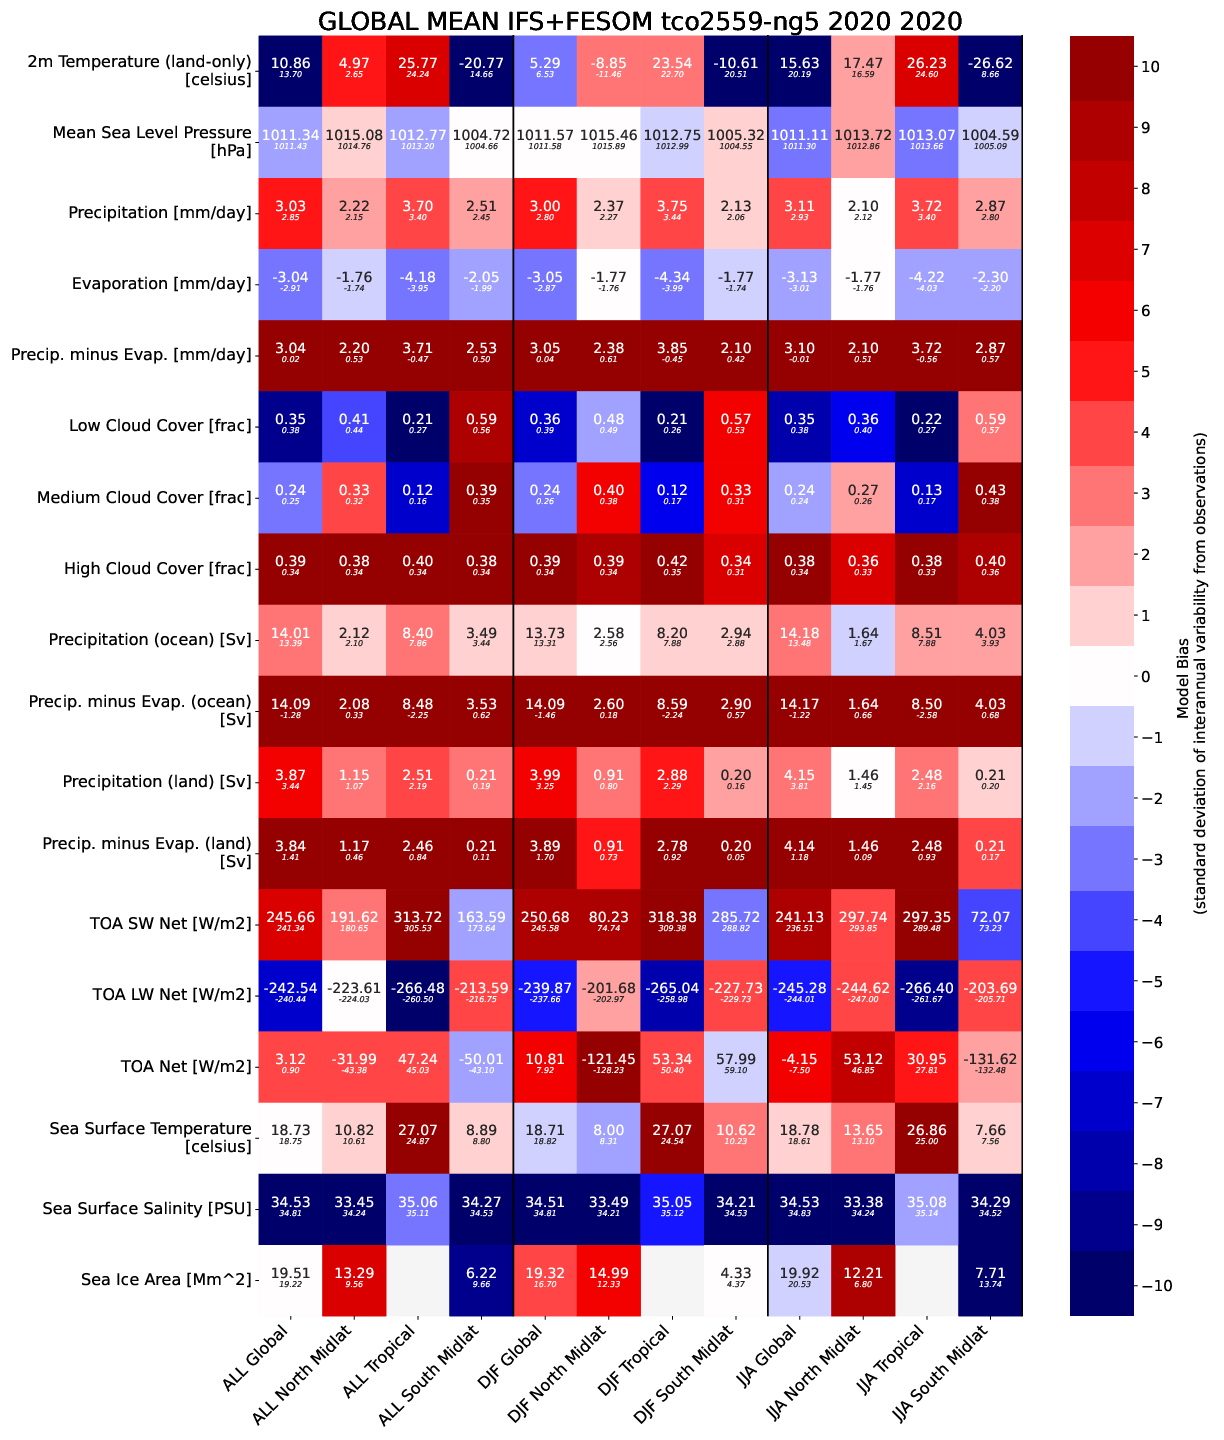

In [24]:
img = WImage(filename=f'/work/bb1153/b382076/ecmean/figures/global_mean_{exp}_{model_atm}+{model_oce}_r1i1p1f1_{year1}_{year2}.pdf')
img

# Performance indices
Basic call to performance indices

In [26]:
performance_indices(exp, year1, year2, numproc = numproc, config = config, 
            interface = interface, loglevel = 'warning', xdataset = data)

2023-06-29 15:30:46 | ecmean.libs.diagnostic |  WARNING -> You asked to use your own xarray dataset/datarray...


Welcome to ECmean4 v0.1.3: Running performance_indices!


2023-06-29 15:30:46 | ecmean.libs.files |  WARNING -> Inifile /home/b/b382076/work/datasets/IFS-tco2559-ng5/tco2559-ng5/work/bb1153/b382076/AQUA-archive/masks/lonlat/oce_mask_r100.nc cannot be found!
2023-06-29 15:30:46 | ecmean.libs.support |  WARNING -> Atmosphere grid is is a lonlat grid!
2023-06-29 15:30:56 | ecmean.libs.support |  WARNING -> Oceanic grid is is a lonlat grid!
2023-06-29 15:30:58 | ecmean |  WARNING -> Preproc in 11.3941 seconds
2023-06-29 15:31:00 | ecmean.performance_indices |  WARNING -> ta: Need to interpolate vertical levels...


PI for Global ALL ta 18.573


2023-06-29 15:31:00 | ecmean.performance_indices |  WARNING -> ta: Need to interpolate vertical levels...


PI for Global DJF ta 7.57


2023-06-29 15:31:01 | ecmean.performance_indices |  WARNING -> ta: Need to interpolate vertical levels...


PI for Global JJA ta 19.342


2023-06-29 15:31:02 | ecmean.performance_indices |  WARNING -> ua: Need to interpolate vertical levels...


PI for Global ALL ua 4.245


2023-06-29 15:31:03 | ecmean.performance_indices |  WARNING -> ua: Need to interpolate vertical levels...


PI for Global DJF ua 2.343


2023-06-29 15:31:04 | ecmean.performance_indices |  WARNING -> ua: Need to interpolate vertical levels...


PI for Global JJA ua 5.245


2023-06-29 15:31:05 | ecmean.performance_indices |  WARNING -> va: Need to interpolate vertical levels...


PI for Global ALL va 3.718


2023-06-29 15:31:06 | ecmean.performance_indices |  WARNING -> va: Need to interpolate vertical levels...


PI for Global DJF va 2.032


2023-06-29 15:31:06 | ecmean.performance_indices |  WARNING -> va: Need to interpolate vertical levels...


PI for Global JJA va 4.612


2023-06-29 15:31:08 | ecmean.performance_indices |  WARNING -> hus: Need to interpolate vertical levels...


PI for Global ALL hus 14.142


2023-06-29 15:31:09 | ecmean.performance_indices |  WARNING -> hus: Need to interpolate vertical levels...


PI for Global DJF hus 14.523


2023-06-29 15:31:10 | ecmean.performance_indices |  WARNING -> hus: Need to interpolate vertical levels...


PI for Global JJA hus 13.446
PI for Global ALL tas 35.959
PI for Global DJF tas 16.163
PI for Global JJA tas 27.218
PI for Global ALL pr 5.444
PI for Global DJF pr 3.438
PI for Global JJA pr 5.181
PI for Global ALL psl 3.573
PI for Global DJF psl 1.785
PI for Global JJA psl 2.83
PI for Global ALL tos 10.906
PI for Global DJF tos 6.727
PI for Global JJA tos 8.588
PI for Global ALL sos 8.029
PI for Global DJF sos 5.891
PI for Global JJA sos 6.789
PI for Global ALL siconc 4.421
PI for Global DJF siconc 1.576
PI for Global JJA siconc 11.312


2023-06-29 15:31:12 | ecmean |  WARNING -> Done in 14.8454 seconds with 1 processors
2023-06-29 15:31:13 | ecmean |  WARNING -> Postproc done in 1.0367 seconds


Open the obtained txt file

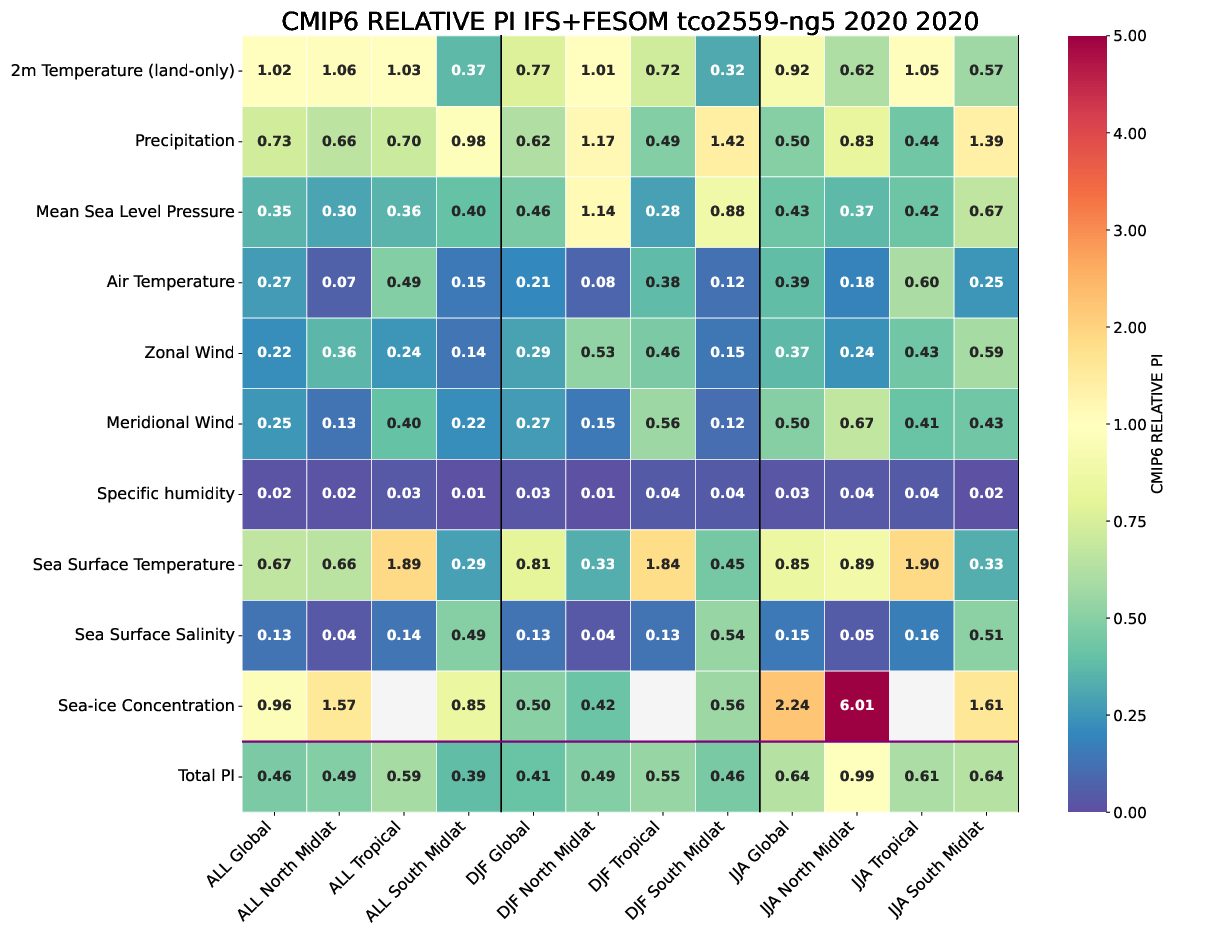

In [27]:
img = WImage(filename=f'/work/bb1153/b382076/ecmean/figures/PI4_EC23_{exp}_{model_atm}+{model_oce}_r1i1p1f1_{year1}_{year2}.pdf')
img